In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.fft import fft
# import tsfel
from scipy.signal import savgol_filter
from sklearn.model_selection import KFold
from tsfresh import extract_relevant_features
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


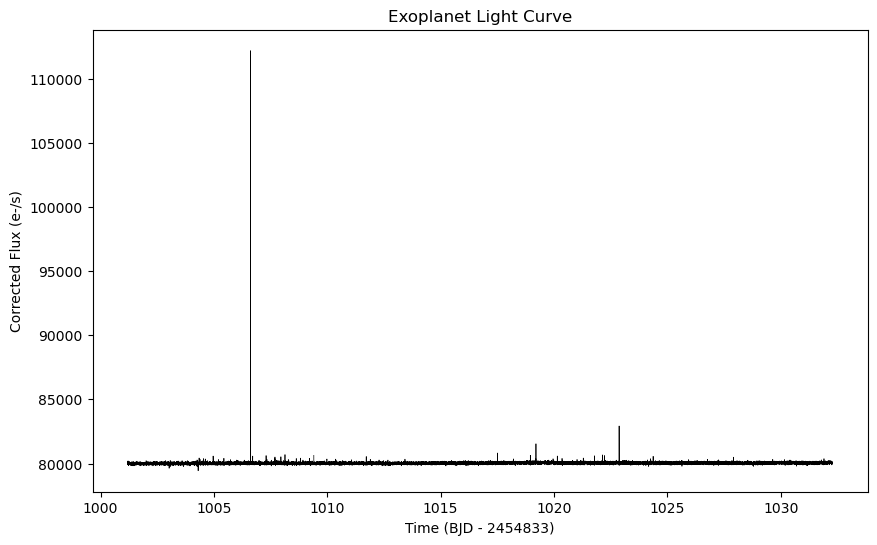

In [3]:
file_path = "./data/positive/kplr001871056-2011303113607_slc.fits"
with fits.open(file_path) as hdul:
    data = hdul[1].data
    header = hdul[1].header
    #print(data[:5])
    time = data['TIME']
    flux = data['PDCSAP_FLUX']
    
    # Plot the light curve
    plt.figure(figsize=(10, 6))
    plt.plot(time, flux, 'k-', markersize=1, lw=0.5)
    plt.xlabel('Time (BJD - 2454833)')
    plt.ylabel('Corrected Flux (e-/s)')
    plt.title('Exoplanet Light Curve')
    plt.show()
    #print(header)  # Print header information

Filename: ./data/negative/kplr000892772-2010078095331_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4397R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


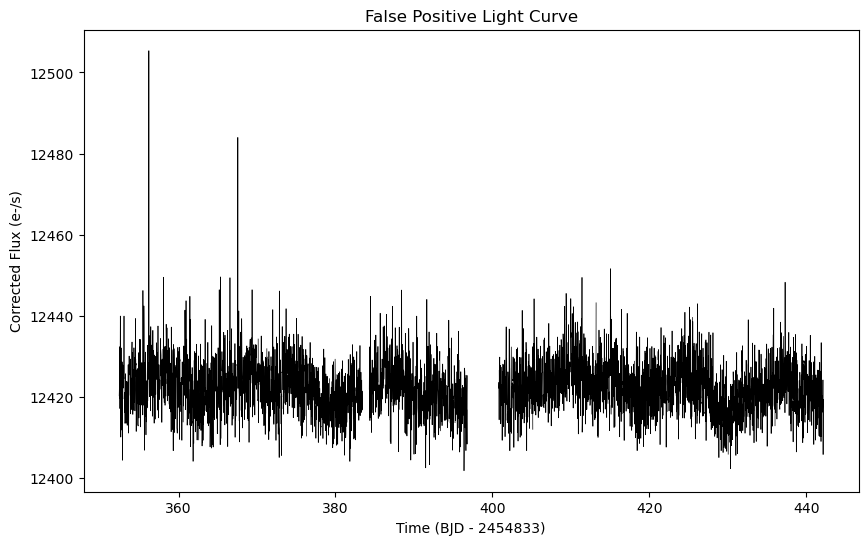

In [3]:
file_path = "./data/negative/kplr000892772-2010078095331_llc.fits"
with fits.open(file_path) as hdul:
    # Print information about the HDUs (Header/Data Units) in the file
    hdul.info()

    # Access the primary HDU data and header
    data = hdul[1].data  # Usually the time-series data is in HDU 1
    header = hdul[1].header
    #print(header)
    time = data['TIME']
    flux = data['PDCSAP_FLUX']

    # Plot the light curve
    plt.figure(figsize=(10, 6))
    plt.plot(time, flux, 'k-', markersize=1, lw=0.5)
    plt.xlabel('Time (BJD - 2454833)')
    plt.ylabel('Corrected Flux (e-/s)')
    plt.title('False Positive Light Curve')
    plt.show()
    #print(header)  # Print header information

In [4]:
def load_fits_data(folder, label):
    count = -1
    for filename in os.listdir(folder):
        if filename.endswith('.fits'):
            with fits.open(os.path.join(folder, filename)) as hdul:
                try:
                    count += 1
                    data = hdul[1].data
                    time = data['TIME']
                    flux = data['PDCSAP_FLUX']
                    
                    valid_indices = ~np.isnan(time) & ~np.isnan(flux)
                    time = time[valid_indices]
                    flux = flux[valid_indices]
                    mean = np.mean(flux)
                    std = np.std(flux)
                    new_flux = (flux - mean) / std

                    smoothed_flux = savgol_filter(flux, window_length=11, polyorder=2)
                    smoothed_flux = (smoothed_flux - np.mean(smoothed_flux))/np.std(smoothed_flux)
                    df = pd.DataFrame({
                        'time': time,
                        'flux': flux,
                        'id': filename
                    })
                    
                    
                    print("datashape", time.shape, flux.shape,)
                    time_series.append([new_flux, smoothed_flux])
                    labels.append(label)
                except:
                    print("got error for filename", filename)
    

In [5]:
positive_folder = "./data/positive/"
negative_folder = "./data/negative/"
time_series = []
labels = []
extracted_features_list = []

load_fits_data(positive_folder, label=1)
load_fits_data(negative_folder, label=0)
# 
df = pd.DataFrame({
    'time_series': time_series,
    'label': labels
})
# print(df.shape, len(time_series))

datashape (40771,) (40771,)
datashape (4226,) (4226,)
datashape (43977,) (43977,)
datashape (32946,) (32946,)
datashape (1624,) (1624,)
datashape (40771,) (40771,)
datashape (25891,) (25891,)
datashape (469,) (469,)
datashape (4486,) (4486,)
datashape (38005,) (38005,)
datashape (40432,) (40432,)
datashape (4486,) (4486,)
datashape (4366,) (4366,)
datashape (3550,) (3550,)
datashape (4272,) (4272,)
datashape (29389,) (29389,)
datashape (4366,) (4366,)
datashape (4269,) (4269,)
datashape (4226,) (4226,)
datashape (4134,) (4134,)
datashape (4134,) (4134,)
datashape (3106,) (3106,)
datashape (29389,) (29389,)
datashape (4485,) (4485,)
datashape (3550,) (3550,)
datashape (4070,) (4070,)
datashape (29389,) (29389,)
datashape (36546,) (36546,)
datashape (4070,) (4070,)
datashape (3535,) (3535,)
datashape (4610,) (4610,)
datashape (45253,) (45253,)
datashape (3534,) (3534,)
datashape (4608,) (4608,)
datashape (4441,) (4441,)
datashape (3550,) (3550,)
datashape (4243,) (4243,)
datashape (44148

datashape (43543,) (43543,)
datashape (44059,) (44059,)
datashape (3106,) (3106,)
datashape (3535,) (3535,)
datashape (7622,) (7622,)
datashape (4226,) (4226,)
datashape (45254,) (45254,)
datashape (1624,) (1624,)
datashape (4441,) (4441,)
datashape (3534,) (3534,)
datashape (32946,) (32946,)
datashape (45613,) (45613,)
datashape (4366,) (4366,)
datashape (4269,) (4269,)
datashape (45186,) (45186,)
datashape (1285,) (1285,)
datashape (4243,) (4243,)
datashape (3550,) (3550,)
datashape (4134,) (4134,)
datashape (43543,) (43543,)
datashape (4226,) (4226,)
datashape (4134,) (4134,)
datashape (44035,) (44035,)
datashape (3106,) (3106,)
datashape (4134,) (4134,)
datashape (3550,) (3550,)
datashape (46806,) (46806,)
datashape (43543,) (43543,)
datashape (39122,) (39122,)
datashape (4226,) (4226,)
datashape (4272,) (4272,)
datashape (42289,) (42289,)
datashape (4441,) (4441,)
datashape (3535,) (3535,)
datashape (3550,) (3550,)
datashape (4473,) (4473,)
datashape (3106,) (3106,)
datashape (448

datashape (4473,) (4473,)
datashape (3550,) (3550,)
datashape (3106,) (3106,)
datashape (4108,) (4108,)
datashape (3106,) (3106,)
datashape (53283,) (53283,)
datashape (4609,) (4609,)
datashape (46462,) (46462,)
datashape (3550,) (3550,)
datashape (39984,) (39984,)
datashape (4272,) (4272,)
datashape (3106,) (3106,)
datashape (3550,) (3550,)
datashape (44875,) (44875,)
datashape (3534,) (3534,)
datashape (4226,) (4226,)
datashape (4269,) (4269,)
datashape (4245,) (4245,)
datashape (4609,) (4609,)
datashape (4272,) (4272,)
datashape (4108,) (4108,)
datashape (53281,) (53281,)
datashape (4108,) (4108,)
datashape (44875,) (44875,)
datashape (4366,) (4366,)
datashape (4108,) (4108,)
datashape (4108,) (4108,)
datashape (4226,) (4226,)
datashape (1284,) (1284,)
datashape (1285,) (1285,)
datashape (4070,) (4070,)
datashape (4108,) (4108,)
datashape (4226,) (4226,)
datashape (4242,) (4242,)
datashape (3534,) (3534,)
datashape (4441,) (4441,)
datashape (4269,) (4269,)
datashape (4070,) (4070,)


datashape (4269,) (4269,)
datashape (4441,) (4441,)
datashape (3550,) (3550,)
datashape (3535,) (3535,)
datashape (4485,) (4485,)
datashape (1284,) (1284,)
datashape (46462,) (46462,)
datashape (4441,) (4441,)
datashape (3535,) (3535,)
datashape (1284,) (1284,)
datashape (4244,) (4244,)
datashape (4366,) (4366,)
datashape (4366,) (4366,)
datashape (1284,) (1284,)
datashape (4366,) (4366,)
datashape (4269,) (4269,)
datashape (1284,) (1284,)
datashape (4226,) (4226,)
datashape (4272,) (4272,)
datashape (4134,) (4134,)
datashape (4473,) (4473,)
datashape (4608,) (4608,)
datashape (4610,) (4610,)
datashape (4269,) (4269,)
datashape (4242,) (4242,)
datashape (4441,) (4441,)
datashape (4108,) (4108,)
datashape (3535,) (3535,)
datashape (4269,) (4269,)
datashape (4244,) (4244,)
datashape (3106,) (3106,)
datashape (4486,) (4486,)
datashape (4473,) (4473,)
datashape (4269,) (4269,)
datashape (4473,) (4473,)
datashape (4366,) (4366,)
datashape (4269,) (4269,)
datashape (4070,) (4070,)
datashape 

datashape (4609,) (4609,)
datashape (4134,) (4134,)
datashape (4070,) (4070,)
datashape (3535,) (3535,)
datashape (4441,) (4441,)
datashape (4272,) (4272,)
datashape (4226,) (4226,)
datashape (4226,) (4226,)
datashape (4609,) (4609,)
datashape (4366,) (4366,)
datashape (1624,) (1624,)
datashape (4226,) (4226,)
datashape (1284,) (1284,)
datashape (4608,) (4608,)
datashape (4269,) (4269,)
datashape (1284,) (1284,)
datashape (4226,) (4226,)
datashape (1284,) (1284,)
datashape (43543,) (43543,)
datashape (4134,) (4134,)
datashape (4441,) (4441,)
datashape (3535,) (3535,)
datashape (4244,) (4244,)
datashape (4485,) (4485,)
datashape (3550,) (3550,)
datashape (4272,) (4272,)
datashape (1624,) (1624,)
datashape (1624,) (1624,)
datashape (1624,) (1624,)
datashape (4609,) (4609,)
datashape (4226,) (4226,)
datashape (1284,) (1284,)
datashape (4272,) (4272,)
datashape (4272,) (4272,)
datashape (4272,) (4272,)
datashape (1624,) (1624,)
datashape (4609,) (4609,)
datashape (1624,) (1624,)
datashape 

In [6]:
sequence_length = 200
def split_into_segments(light_curve, sequence_length=200):
    segments = []
    #print("light_curve", len(light_curve))
    if len(light_curve[0]) < sequence_length:
        return segments

    frequency_spectrum = fft(light_curve[0])
    magnitude = np.abs(frequency_spectrum)
    phase = np.angle(frequency_spectrum)
    magnitude_features = magnitude[:sequence_length]
        
    for i in range(0, len(light_curve[0]) - sequence_length + 1, sequence_length):
        segment = []
        for j in range(2):
            feature = light_curve[j]
            if(len(feature) < 10):
                print("found less than 10")
            segment.append(feature[i:i + sequence_length])
        segment.append(magnitude_features)
        segments.append(np.array(segment))
    return np.array(segments)

light_curve_segments = []
light_curve_labels = []
count = 0
c2 = 0
total = 0
for i in range(0, len(time_series)):
    light_curve = time_series[i]
    label = labels[i]
    segments = split_into_segments(light_curve)
    for segment in segments:
        if(len(segment) != 3):
            print("woah", len(segment))
        total += 1
        if (len(segment[2]) < 10):
            c2 +=1
        else:
            count += 1
        if(len(segment[0]) < 200 or len(segment[1]) < 200 or len(segment[2]) < 10):
            print("lengths ", len(segment[0]) ,len(segment[1]) ,len(segment[2]))
        #print("segmemt details for light cureve", i, len(segment[2]))
        light_curve_segments.append(segment)
        light_curve_labels.append(label)
print("tot", total, count, c2)
print(len(light_curve_segments), len(light_curve_labels), len(light_curve_segments[0]), len(light_curve_segments[0][0]))

light_curve_segments = np.array(light_curve_segments)
light_curve_labels = np.array(light_curve_labels)

num_features = light_curve_segments.shape[1]
print(light_curve_segments.shape, light_curve_labels.shape)

tot 430293 430293 0
430293 430293 3 200
(430293, 3, 200) (430293,)


In [7]:
def get_ts_model():
    with tf.device('/GPU:0'):
        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.2))
    
        model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.2))
        
        model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.2))
        
        # LSTM layer
        model.add(LSTM(64, return_sequences=False))
        model.add(Dropout(0.2))
        
        # Dense layers
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation='sigmoid'))  # Binary classification
        
        # Compile model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Summary
        model.summary()
        return model

In [8]:
def get_splits(lightcurves, labels):
    print(lightcurves.shape)
    # x = np.array([np.reshape(segment, (sequence_length, 1)) for segment in lightcurves])
    x = np.transpose(lightcurves, (0, 2, 1))
    print("x.shape", x.shape)
    x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2)
    print("x_train.shape", x_train.shape, y_train.shape)
    return x_train, x_test, y_train, y_test
    

In [ ]:
x_train, x_test, y_train, y_test = get_splits(light_curve_segments, light_curve_labels)
print(tf.config.list_physical_devices('GPU'))
model = get_ts_model()
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
devices = tf.config.list_physical_devices()
print(tf.config.list_physical_devices('GPU'))
print("\nDevices: ", devices)

In [9]:
kfold = KFold(n_splits=3, shuffle=True)
scores = []
X= np.transpose(light_curve_segments, (0, 2, 1))
y = light_curve_labels
histories = []
k_fold_model = get_ts_model()
new_x, test_x, new_y, test_y = train_test_split(X, y, test_size=0.2)
print("x_train.shape", new_x.shape, new_y.shape)

for train_index, validation_index in kfold.split(new_x):
    x_train, x_validation = new_x[train_index], new_x[validation_index]
    y_train, y_validation = new_y[train_index], new_y[validation_index]
    history = k_fold_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_validation, y_validation))
    histories.append(history)
    # score = model.evaluate(X_test, y_test, verbose=0)
    # scores.append(score[1])
# Make predictions on the test set
y_pred = (k_fold_model.predict(test_x) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Calculate precision and recall
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Update metrics with true labels and predictions
precision.update_state(test_y, y_pred)
recall.update_state(test_y, y_pred)

# Get the final precision and recall values
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())

2024-11-02 21:24:19.601958: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-02 21:24:19.602660: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-02 21:24:19.603451: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-02 21:24:19.605024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-02 21:24:19.608965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/tensor_py9/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 198, 64)        │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 99, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 99, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 97, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 46, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,257 (501.00 KB)

 Trainable params: 128,257 (501.00 KB)

 Non-trainable params: 0 (0.00 B)

x_train.shape (344234, 200, 3) (344234,)
Epoch 1/10


2024-11-02 21:24:48.079587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1793/1793 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.7041 - loss: 0.5840 - val_accuracy: 0.7760 - val_loss: 0.4401
Epoch 2/10
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step - accuracy: 0.7723 - loss: 0.4491 - val_accuracy: 0.8361 - val_loss: 0.2827
Epoch 3/10
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.8232 - loss: 0.3249 - val_accuracy: 0.8637 - val_loss: 0.2321
Epoch 4/10
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.8521 - loss: 0.2703 - val_accuracy: 0.8703 - val_loss: 0.2188
Epoch 5/10
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.8609 - loss: 0.2474 - val_accuracy: 0.8826 - val_loss: 0.2109
Epoch 6/10
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 52s 29ms/step - accuracy: 0.8686 - loss: 0.2356 - val_accuracy: 0.8897 - val_loss: 0.1964
Epoch 7/10
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.8762 - loss: 0.2260 - val_accuracy: 0.8902 - val_loss: 0.1994
Epoch 8/10
1793/1793 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.8815 - loss: 0.21

In [ ]:
y_pred = (k_fold_model.predict(test_x) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Calculate precision and recall
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Update metrics with true labels and predictions
precision.update_state(test_y, y_pred)
recall.update_state(test_y, y_pred)

# Get the final precision and recall values
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())

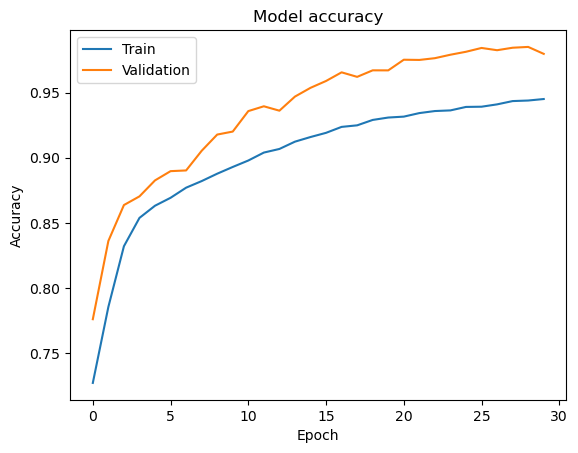

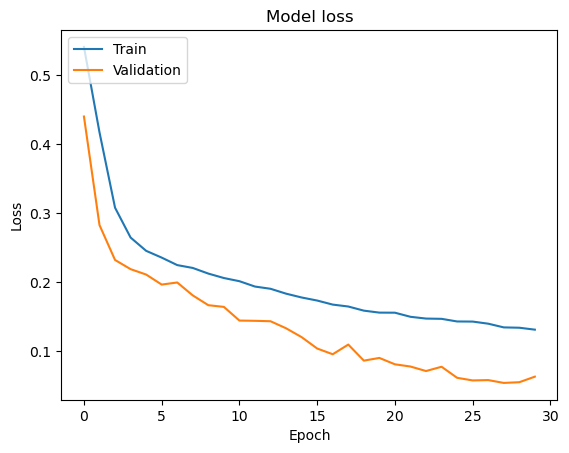

In [10]:
train_accuracy_list = []
train_loss_list = []
validation_accuracy_list = []
validation_loss_list = []
for history in histories:
    train_accuracy_list.extend(history.history['accuracy'])
    train_loss_list.extend(history.history['loss'])
    validation_accuracy_list.extend(history.history['val_accuracy'])
    validation_loss_list.extend(history.history['val_loss'])
    
plt.plot(train_accuracy_list)
plt.plot(validation_accuracy_list)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(train_loss_list)
plt.plot(validation_loss_list)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()